In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Raw_Housing_Prices3.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
sum(data.isnull().sum())

19485

## Feature Transformation

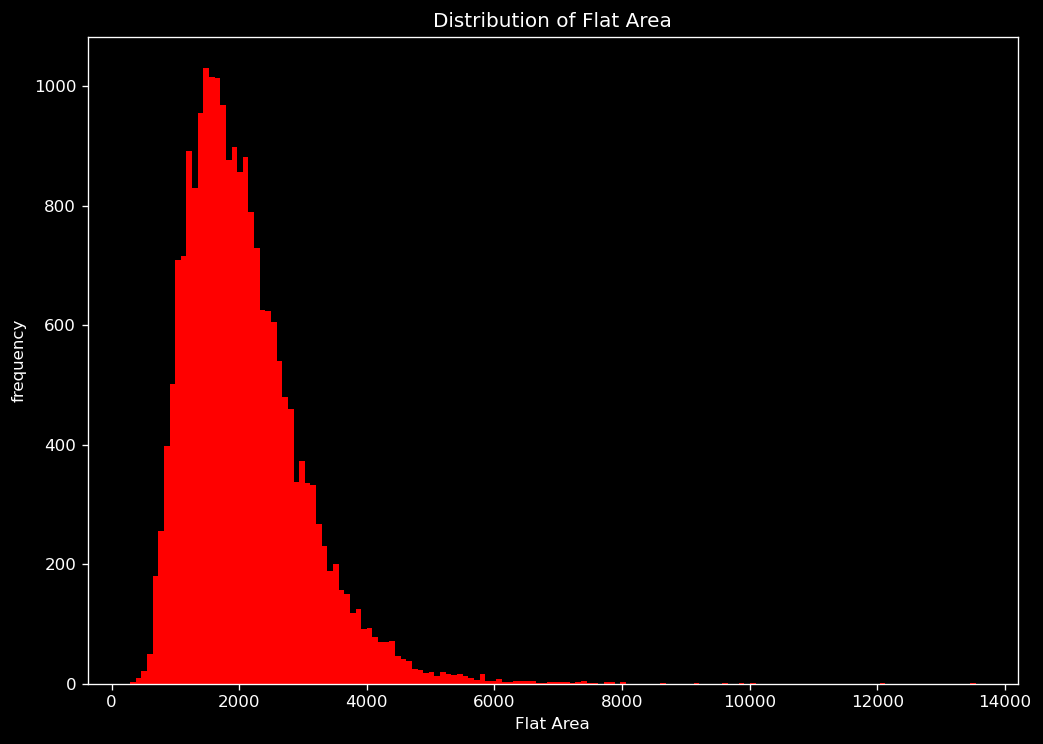

In [5]:
plt.figure( figsize = (10,7), dpi = 120)
plt.hist(data['Flat Area (in Sqft)'], bins = 150, color = 'red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('Distribution of Flat Area')
plt.show()

In [6]:
def log_transform(sample_data):
  return np.log(sample_data)

In [7]:
data['Transformed Flat Area'] = data['Flat Area (in Sqft)'].map(log_transform)

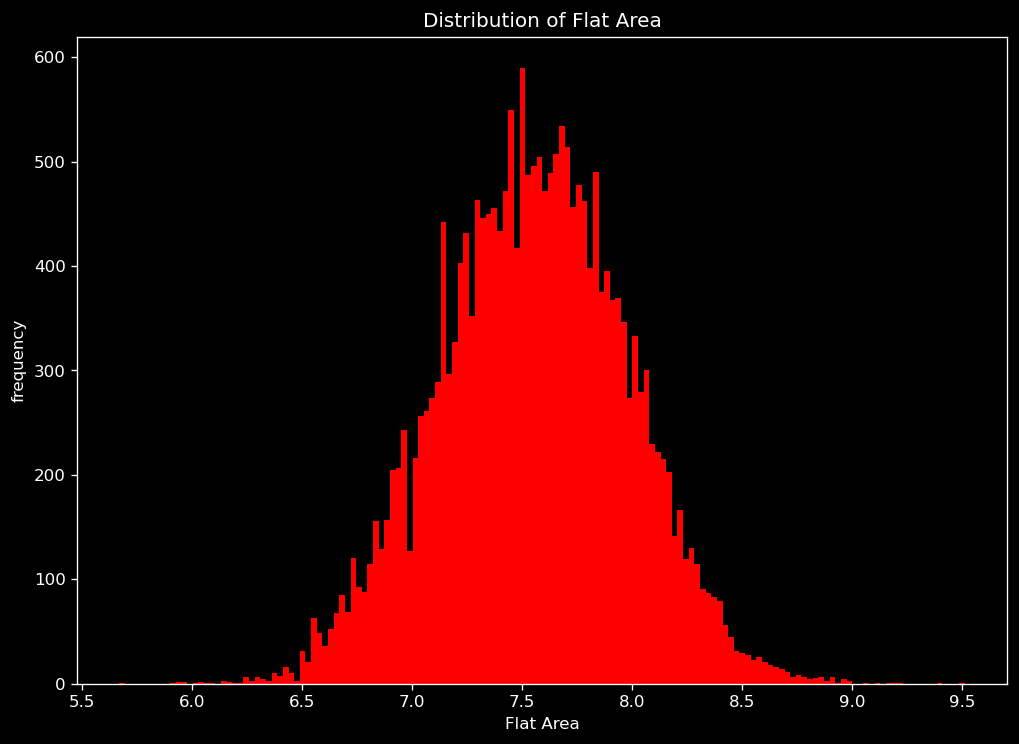

In [8]:
plt.figure( figsize = (10,7), dpi = 120)
plt.hist(data['Transformed Flat Area'], bins = 150, color = 'red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('Distribution of Flat Area')
plt.show()

## Dummy/One Hot Encoding

In [9]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [10]:
dummy_var1 = pd.get_dummies( data['Condition of the House'], drop_first = True, prefix = 'Condition')
dummy_var1.head()

,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Okay
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,True,False,False,False
4,False,True,False,False


In [11]:
label_encoded = data['Condition of the House']
label_encoded.value_counts()

Condition of the House
Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

In [12]:
label_encoded = label_encoded.map({ 'Bad':1,
                                    'Okay':2,
                                    'Fair':3,
                                    'Good':4,
                                    'Excellent':5})
label_encoded.value_counts()

Condition of the House
3    14028
4     5678
5     1701
2      172
1       30
Name: count, dtype: int64

In [13]:
len(data['Age of House (in Years)'].unique())

116

In [14]:
data['Age of House (in Years)'].max()

118

In [15]:
data['Age of House (in Years)'].min()

3

In [16]:
def age_of_house(x):
  if x < 10:
    x = 'new'
  elif x < 50:
    x = 'old'
  else:
    x = 'very old'
  return x

In [17]:
cat_house_age = data['Age of House (in Years)'].map(age_of_house)
cat_house_age.unique()

array(['very old', 'old', 'new'], dtype=object)

In [18]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [19]:
data['Condition of the House'].value_counts()

Condition of the House
Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

In [21]:
mean = []

for i in data['Condition of the House'].unique():
  mean.append(data['Sale Price'][data['Condition of the House'] == i].mean())

Text(0, 0.5, 'mean sale Prie')

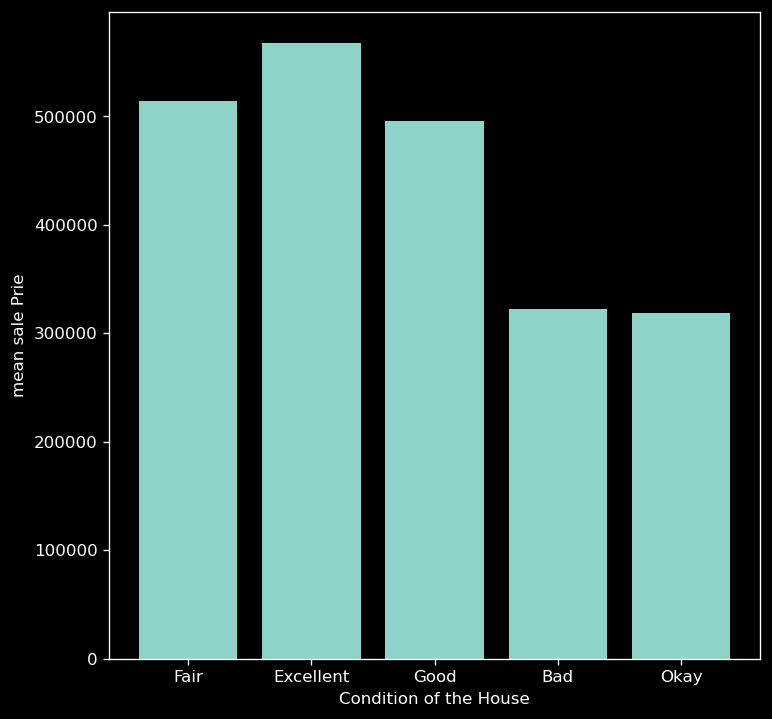

In [22]:
plt.figure( figsize = (7,7), dpi = 120)

plt.bar( data['Condition of the House'].unique(), mean)
plt.xlabel('Condition of the House')
plt.ylabel("mean sale Prie")

In [23]:
mapping = {'Excellent':'Excellent',
           'Fair':'Good',
           'Good':'Good',
           'Okay':'Okay',
           'Bad':'Okay'}
data['Condition of the House'] = data['Condition of the House'].map(mapping)

In [24]:
mean = []

for i in data['Condition of the House'].unique():
  mean.append(data['Sale Price'][data['Condition of the House'] == i].mean())

Text(0, 0.5, 'mean sale Prie')

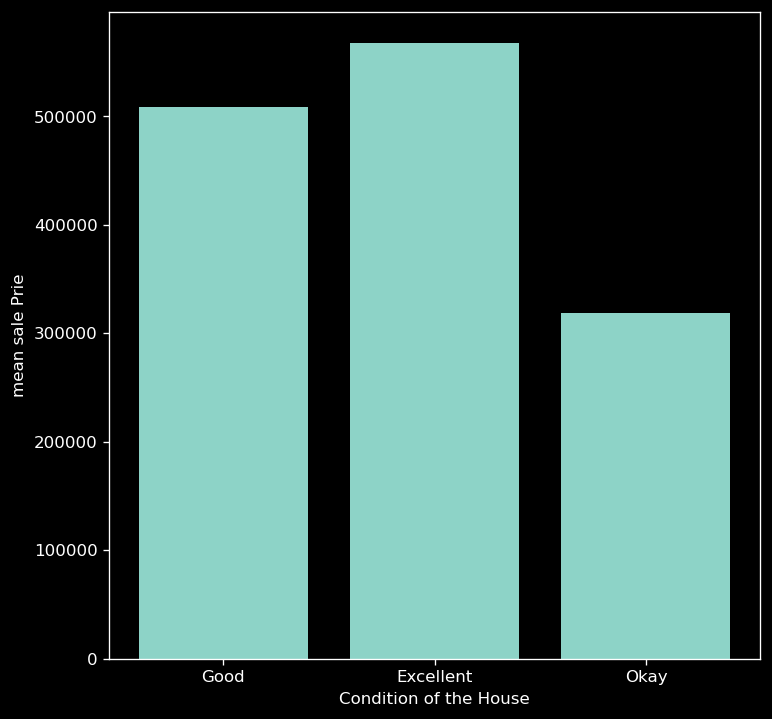

In [25]:
plt.figure( figsize = (7,7), dpi = 120)

plt.bar( data['Condition of the House'].unique(), mean)
plt.xlabel('Condition of the House')
plt.ylabel("mean sale Prie")

In [26]:
data['Date House was Sold'].head()

0     14 October 2017
1    14 December 2017
2    15 February 2016
3    14 December 2017
4    15 February 2016
Name: Date House was Sold, dtype: object

In [30]:
time = pd.DatetimeIndex(data['Date House was Sold'])
data['year_sold'] = time.year
data["month_sold"] = time.month
data['weekday_sold'] = time.strftime('%A')
data['date_sold'] = time.days_in_month

data[['year_sold','month_sold','weekday_sold','date_sold']].head()

,year_sold,month_sold,weekday_sold,date_sold
0,2017,10,Saturday,31
1,2017,12,Thursday,31
2,2016,2,Monday,29
3,2017,12,Thursday,31
4,2016,2,Monday,29


In [ ]:
month_sale = pd.pivot_table(data, values = 'Sale Price',
               columns = 'month_sold',
                aggfunc = 'mean')

month_sale

Text(0, 0.5, 'mean_sale')

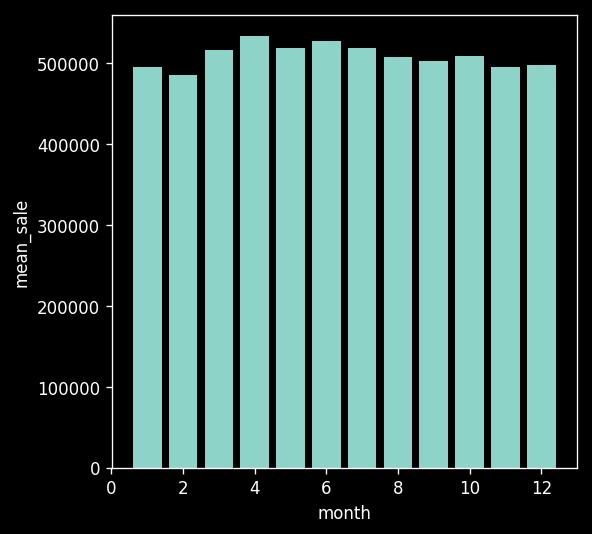

In [28]:
plt.figure( figsize = (5,5), dpi = 120)
plt.bar(month_sale.columns, month_sale.iloc[0])
plt.xlabel("month")
plt.ylabel('mean_sale')

In [29]:
weekday_sale = pd.pivot_table(data, values = 'Sale Price',
               columns = 'weekday_sold',
                aggfunc = 'mean')

weekday_sale

weekday_sold,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Sale Price,520448.811624,499055.835999,508442.986155,518714.583092,500126.758398,506753.572298,527367.035337


Text(0, 0.5, 'mean_sale')

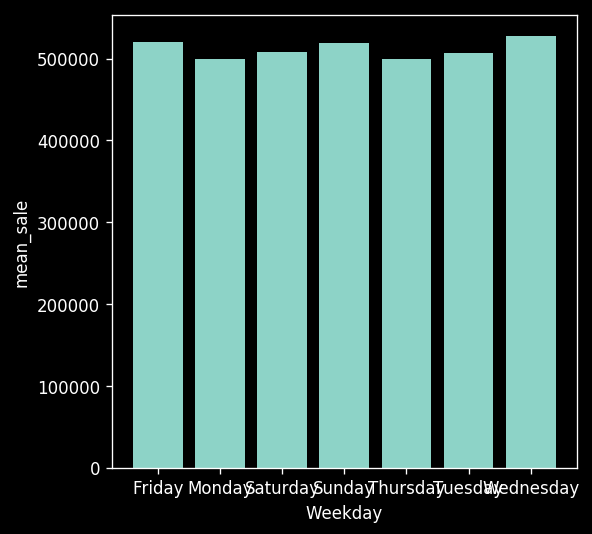

In [30]:
plt.figure( figsize = (5,5), dpi = 120)
plt.bar(weekday_sale.columns, weekday_sale.iloc[0])
plt.xlabel("Weekday")
plt.ylabel('mean_sale')

In [31]:
date_sale = pd.pivot_table(data, values = 'Sale Price',
               columns = 'date_sold',
                aggfunc = 'mean')

date_sale

date_sold,29,30,31
Sale Price,485457.269015,517266.623436,510817.80564


Text(0, 0.5, 'mean_sale')

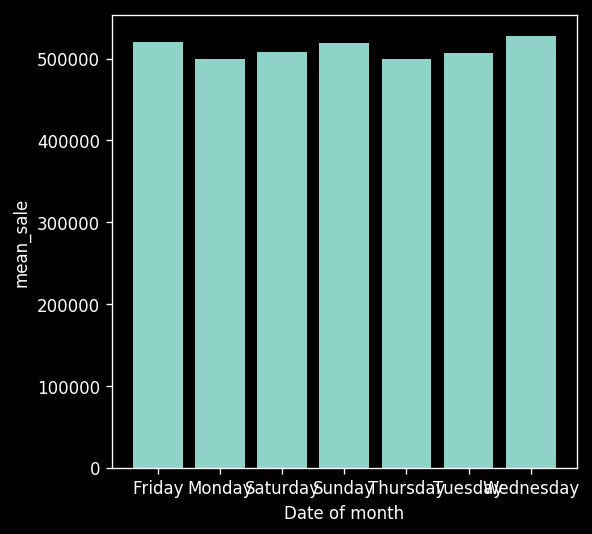

In [32]:
plt.figure( figsize = (5,5), dpi = 120)
plt.bar(weekday_sale.columns, weekday_sale.iloc[0])
plt.xlabel("Date of month")
plt.ylabel('mean_sale')

Text(0, 0.5, 'frequency ratio')

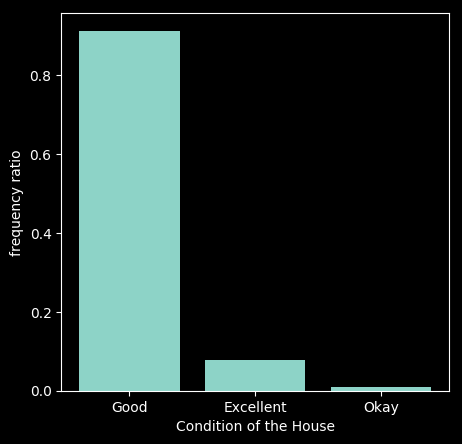

In [33]:
freq_condition = data['Condition of the House'].value_counts()
freq_condition = freq_condition/freq_condition.sum()

plt.figure( figsize = (5,5), dpi = 100)
plt.bar(freq_condition.index, freq_condition)
plt.xlabel('Condition of the House')
plt.ylabel('frequency ratio')

In [34]:
data['freq_cond'] = 0

for i in data['Condition of the House'].unique():
  data['freq_cond'][data['Condition of the House']==i] = freq_condition.loc[i]

data['freq_cond'].head()

0    0.911935
1    0.911935
2    0.911935
3    0.078717
4    0.911935
Name: freq_cond, dtype: float64

In [35]:
data.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'Transformed Flat Area',
       'year_sold', 'month_sold', 'weekday_sold', 'date_sold', 'freq_cond'],
      dtype='object')

In [37]:
def luxury_home(row):
  count = 0
  if row[0] =='Yes':
    count = count+1
  if row[1] in ['Excellent','Good']:
    count = count+1
  if row[2] >= 8:
    count = count+1  
  if count >= 2 :
    return 'Yes'
  else:
    return "No"
  
data['luxury_home'] = data[['Waterfront View','Condition of the House','Overall Grade']].apply(luxury_home, axis = 1)

data['luxury_home'].unique()

array(['No', 'Yes'], dtype=object)

In [38]:
data['luxury_home'].value_counts()

No     11285
Yes    10324
Name: luxury_home, dtype: int64

In [39]:
luxury = data.pivot_table(values = "Sale Price", columns = 'luxury_home', aggfunc = 'mean' )
luxury

luxury_home,No,Yes
Sale Price,380385.64475,655067.166021


Text(0, 0.5, ' Mean Sale Price')

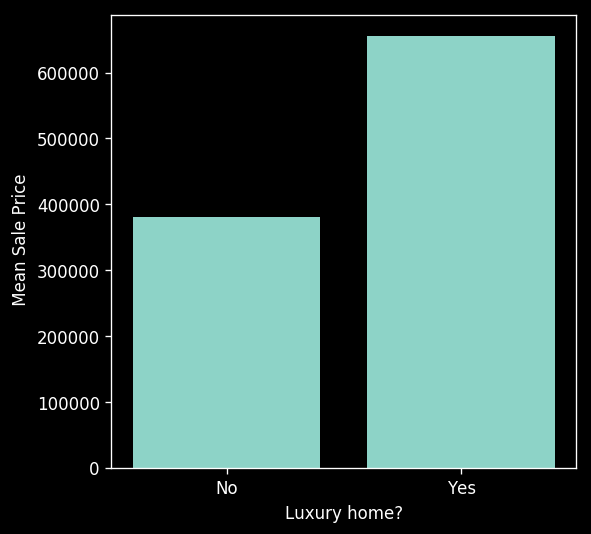

In [40]:
plt.figure(figsize = (5,5), dpi = 120)
plt.bar(luxury.columns, luxury.iloc[0])
plt.xlabel('Luxury home?')
plt.ylabel(" Mean Sale Price")


In [41]:
import os
import multiprocessing

mem_bytes = os.sysconf('SC_PAGE_SIZE') * os.sysconf('SC_PHYS_PAGES')  # e.g. 4015976448
mem_gib = mem_bytes/(1024.**3)  # e.g. 3.74
print("RAM: %f GB" % mem_gib)
print("CORES: %d" % multiprocessing.cpu_count())

RAM: 12.717430 GB
CORES: 2
